In [1]:
# Geopandas
import geopandas as gpd
# Inline plots
%matplotlib inline

In [2]:
# Read countries
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [3]:
# European countries
eur_countries = countries.loc[countries['continent'] == 'Europe'].set_index('name')
print(len(eur_countries))
eur_countries.head()

39


,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
Austria,8210281.0,Europe,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
Belgium,10414336.0,Europe,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
Bulgaria,7204687.0,Europe,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
Bosnia and Herz.,4613414.0,Europe,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [4]:
# Ask myself whether I've been to these countries, and store answer
for c in eur_countries.index:
    ans = input(prompt="Have you been to {}? (y/n) ".format(c))
    eur_countries.loc[c, 'been_to'] = ans

Have you been to Albania? (y/n) n
Have you been to Austria? (y/n) y
Have you been to Belgium? (y/n) y
Have you been to Bulgaria? (y/n) y
Have you been to Bosnia and Herz.? (y/n) y
Have you been to Belarus? (y/n) n
Have you been to Switzerland? (y/n) y
Have you been to Czech Rep.? (y/n) y
Have you been to Germany? (y/n) y
Have you been to Denmark? (y/n) y
Have you been to Spain? (y/n) y
Have you been to Estonia? (y/n) n
Have you been to Finland? (y/n) n
Have you been to France? (y/n) y
Have you been to United Kingdom? (y/n) y
Have you been to Greece? (y/n) y
Have you been to Croatia? (y/n) y
Have you been to Hungary? (y/n) y
Have you been to Ireland? (y/n) y
Have you been to Iceland? (y/n) n
Have you been to Italy? (y/n) y
Have you been to Kosovo? (y/n) n
Have you been to Lithuania? (y/n) n
Have you been to Luxembourg? (y/n) y
Have you been to Latvia? (y/n) n
Have you been to Moldova? (y/n) n
Have you been to Macedonia? (y/n) n
Have you been to Montenegro? (y/n) y
Have you been to Nethe

In [21]:
eur_countries.loc['Russia']

pop_est                                             1.40041e+08
continent                                                Europe
iso_a3                                                      RUS
gdp_md_est                                            2.266e+06
geometry      (POLYGON ((143.6480074403629 50.74760040954152...
been_to                                                       n
Name: Russia, dtype: object

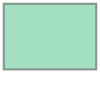

In [68]:
bounds = eur_countries[(eur_countries['iso_a3'] != 'FRA') & (eur_countries['iso_a3'] != 'RUS')].unary_union.envelope
bounds

In [77]:
aux = eur_countries.intersection(bounds)
eur_countries_cropped = eur_countries.copy()
eur_countries_cropped.geometry = aux.geometry
eur_countries_cropped

,pop_est,continent,iso_a3,gdp_md_est,geometry,been_to
name,,,,,,
Albania,3639453.0,Europe,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",n
Austria,8210281.0,Europe,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",y
Belgium,10414336.0,Europe,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,...",y
Bulgaria,7204687.0,Europe,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,...",y
Bosnia and Herz.,4613414.0,Europe,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,...",y
Belarus,9648533.0,Europe,BLR,114100.0,"POLYGON ((23.48412763844985 53.91249766704114,...",n
Switzerland,7604467.0,Europe,CHE,316700.0,"POLYGON ((9.59422610844635 47.52505809182027, ...",y
Czech Rep.,10211904.0,Europe,CZE,265200.0,"POLYGON ((16.96028812019458 48.5969823268506, ...",y
Germany,82329758.0,Europe,DEU,2918000.0,"POLYGON ((9.921906365609232 54.98310415304803,...",y


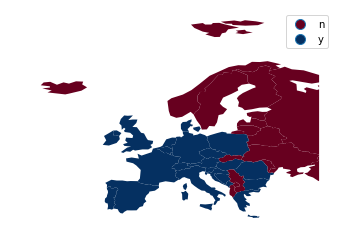

In [87]:
# So I've been to...
ax = eur_countries_cropped.plot(column='been_to', cmap='RdBu', legend=True)
_ = ax.set_axis_off()